### TASK 1 



## Use classification technique for prediction of Graduate admissions from an Indian perspective

The dataset contains several parameters which are considered important during the application for Masters Programs. 
The parameters included are : 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose 
5. Letter of Recommendation Strength ( out of 5 ) 
6. Undergraduate GPA ( out of 10 ) 
7. Research Experience ( either 0 or 1 ) 
8. Chance of Admit ( ranging from 0 to 1 )

### Data Preparation

#### Importing libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


### load the dataset

In [2]:
# Loading the dataset
df = pd.read_csv('D:/DATA/InternSavy/task1/Admission_Predict_Ver1.1.csv')

### to perform EDA

In [3]:
# Checking top 5 records in dataframe
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns = ['Serial No.'], axis = 1, inplace = True)

In [5]:
# Checking the number of rows and columns
print(df.shape)

(500, 8)


In [6]:
# check the data types and null values of the dataset
print(df.info())
print('Information about null values in dataset\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None
Information about null values in dataset

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64


#No null values in the dataset

In [7]:
# check the descriptive statistics of the dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Exploratory Data Analysis

In [8]:
# list out the columns
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

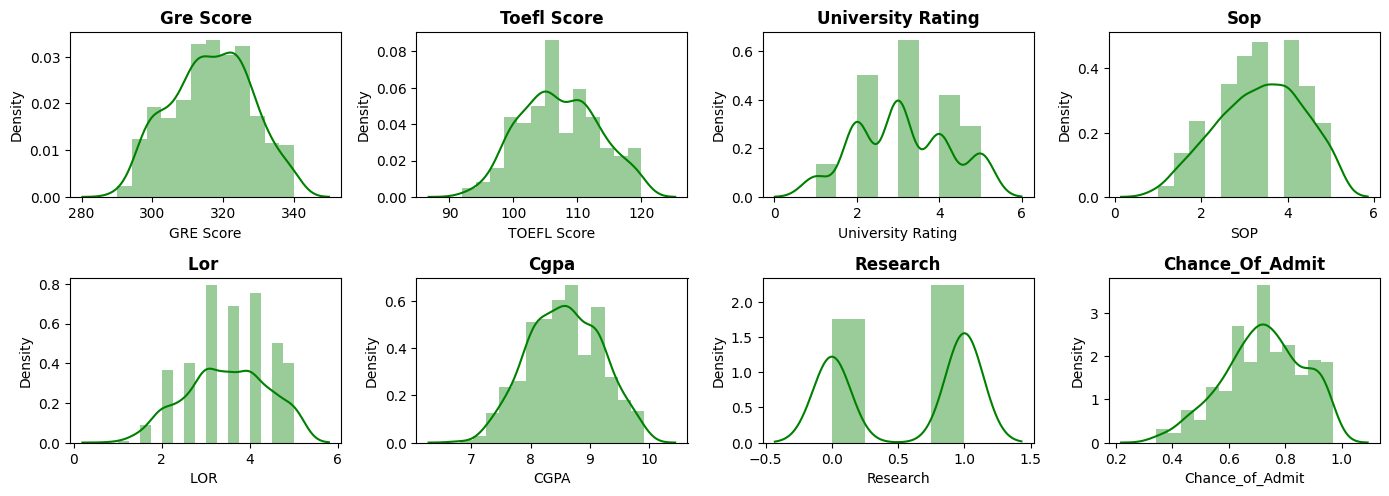

In [9]:
# Visualizing the distributions.
plt.figure(figsize=(14,12))
for n,column in enumerate(df):
  plt.subplot(5, 4, n+1)
  sns.distplot(df[column], color = 'g')
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

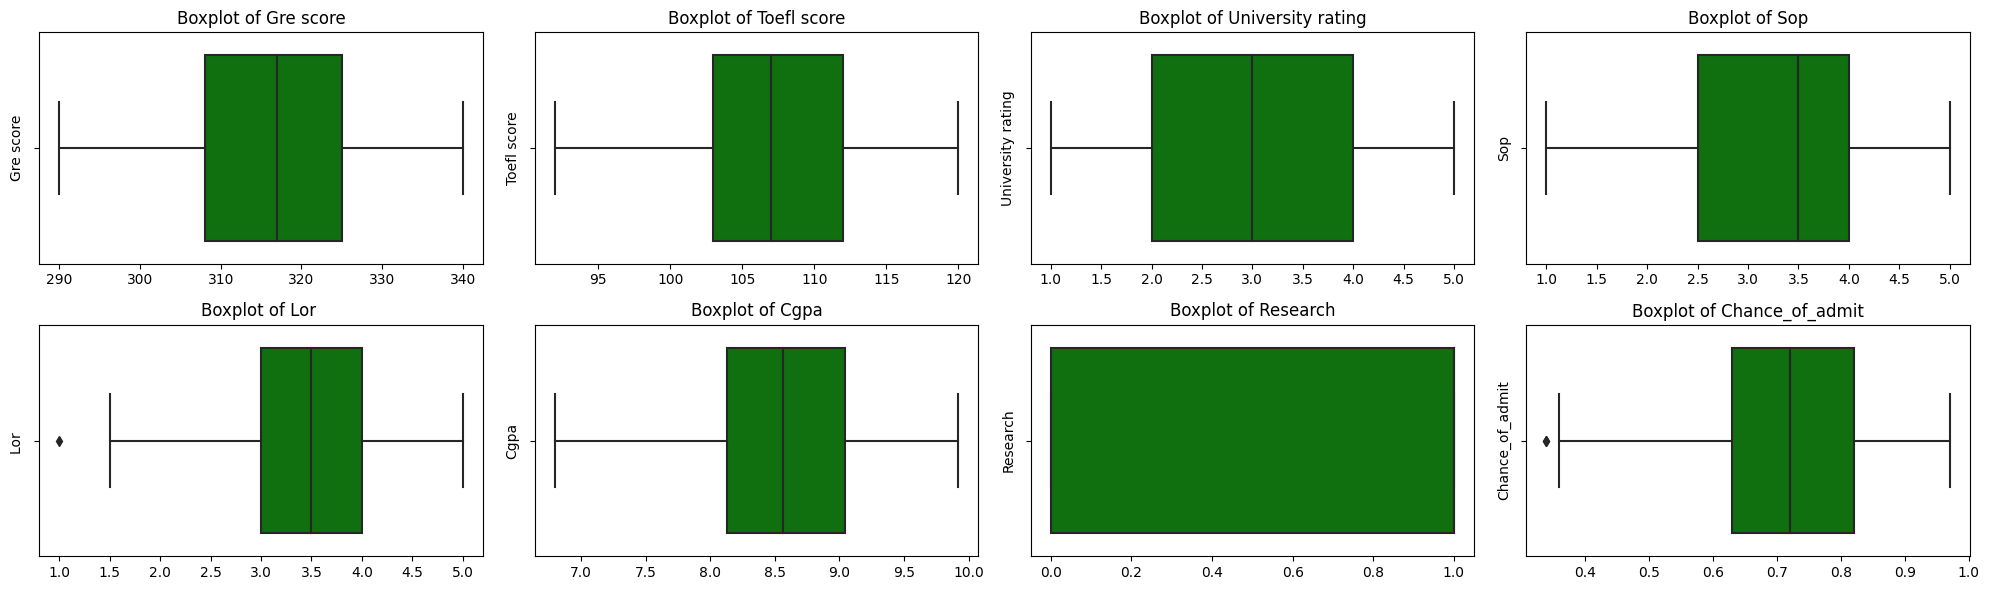

In [10]:
# Create the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 6))

# Flatten the axes if necessary
axes = axes.flatten()

# Loop through each feature and plot the boxplot
for i, feature in enumerate(df):
    ax = axes[i]
    
    sns.boxplot(data=df, x=feature, ax=ax,color="green")
    ax.set_xlabel('')
    ax.set_ylabel(feature.capitalize())
    ax.set_title(f'Boxplot of {feature.capitalize()}')

# Adjust the spacing between subplots
fig.tight_layout()
# Show the plot
plt.show()

In [12]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


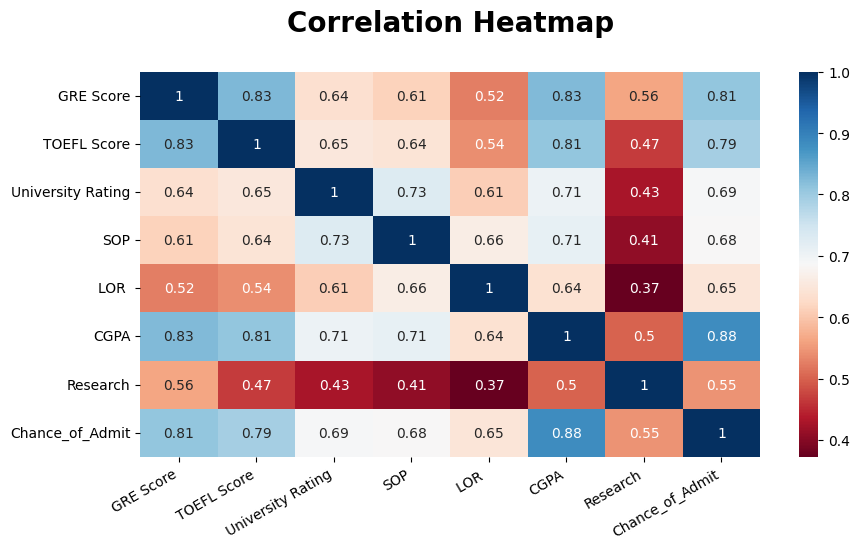

In [13]:
# Checking corelations
plt.figure(figsize=(10,5))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='RdBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Correlation Heatmap\n", size = 20, weight = 'heavy')
plt.show()


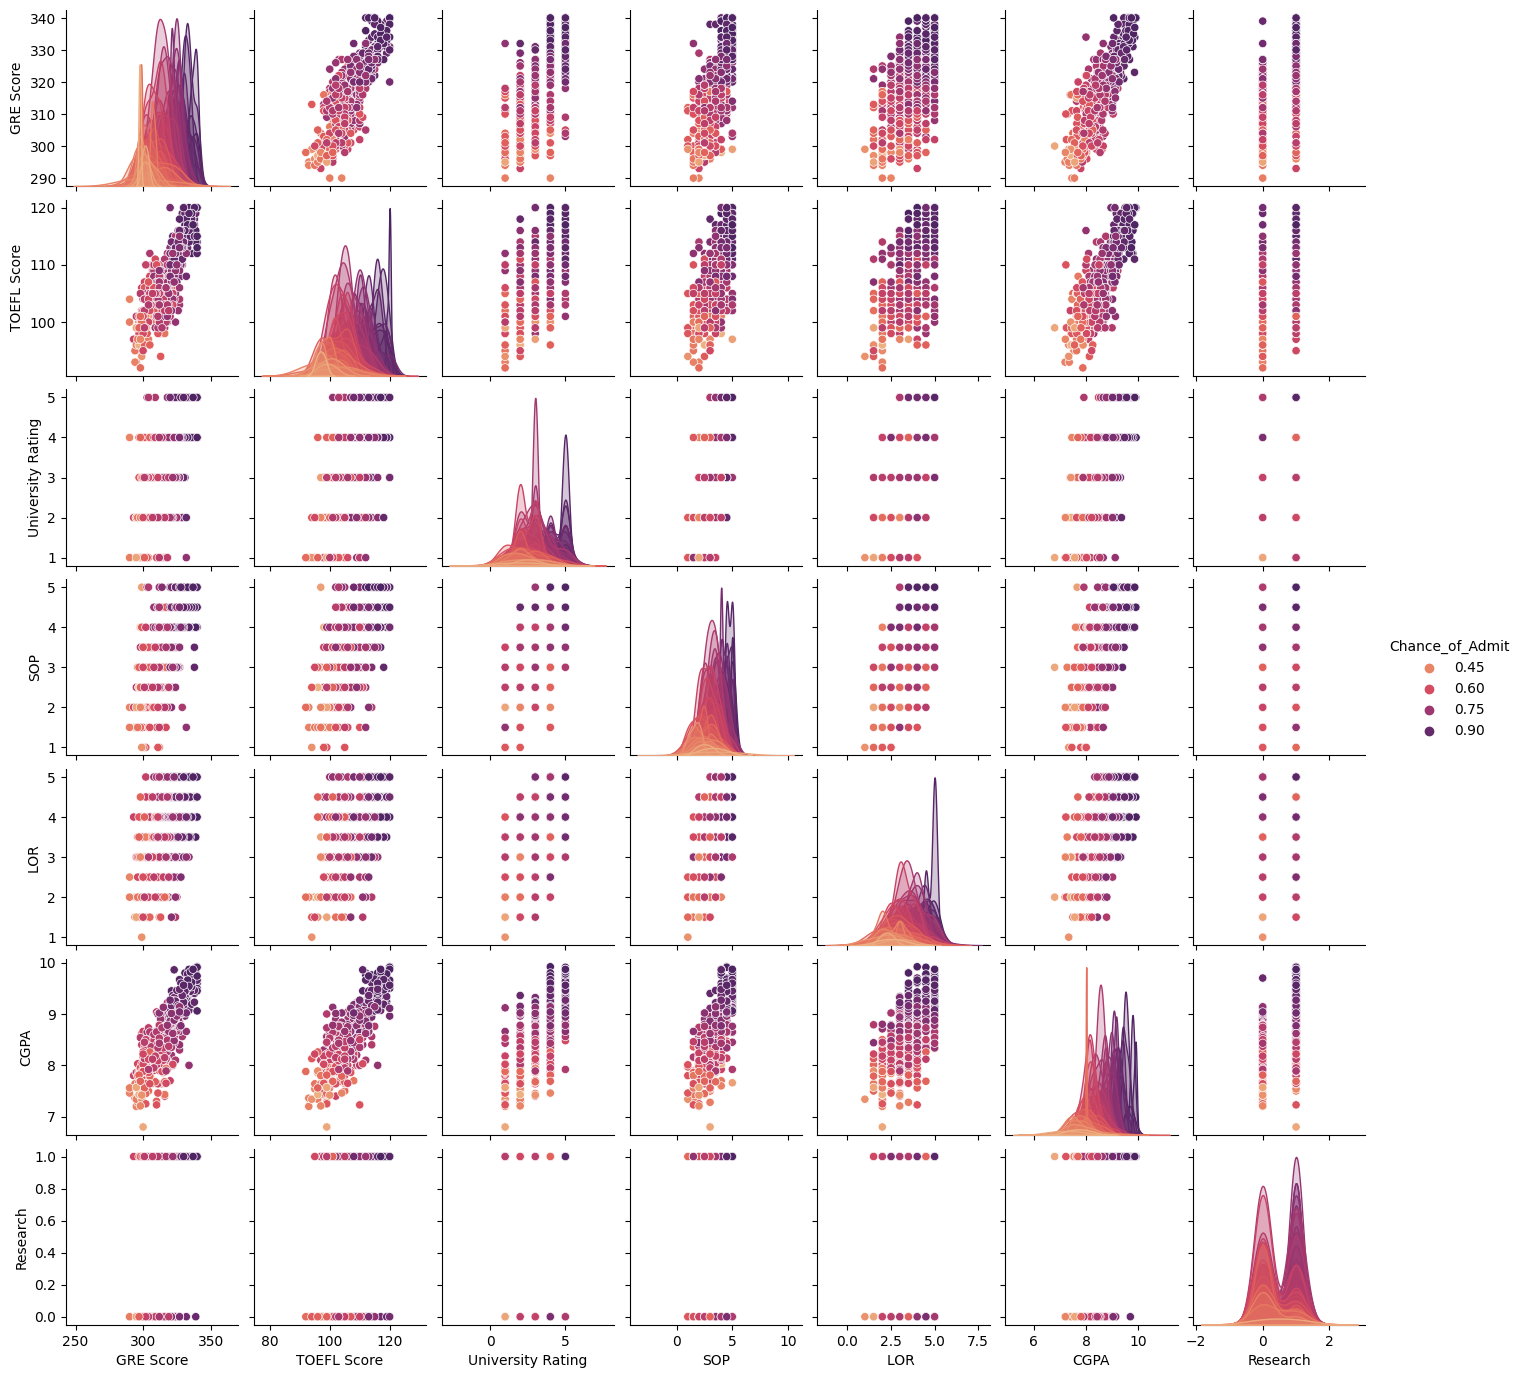

In [14]:
#Looking at how the data behaves with each other
sns.pairplot(df, hue = 'Chance_of_Admit', palette="flare", size = 2)
plt.show()

In [15]:
# creating a threshold to divide chance of admit
threshold = 0.7
df['Admitted'] = (df['Chance_of_Admit'] >= threshold).astype(int)

In [16]:
# Split the data into features (X) and the new binary target (y)
X = df.drop(['Chance_of_Admit', 'Admitted'], axis=1)
y = df['Admitted']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Train test Split

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training through different classification Algorithms

### Logistic Regression

In [20]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train, y_train)


In [21]:
# Make predictions on the test set
log_y_pred = log_model.predict(X_test)

In [22]:
log_accuracy = accuracy_score(y_test, log_y_pred)
log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1score = f1_score(y_test, log_y_pred)

In [23]:
print("Accuracy    : {} \nPrecision   : {} \nRecall      : {} \nF1 Score    : {}".format(log_accuracy,
                                                                      log_precision,
                                                                      log_recall,
                                                                      log_f1score))

Accuracy    : 0.86 
Precision   : 0.8596491228070176 
Recall      : 0.8909090909090909 
F1 Score    : 0.875


# K-Nearest neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# I will be checking the accuracy of KNN Model by looping through the number of neighbors

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    print("Accuracy of the KNN Model with {} neighbors is {}".format(i, accuracy_score(y_test, knn_y_pred)))

Accuracy of the KNN Model with 1 neighbors is 0.78
Accuracy of the KNN Model with 2 neighbors is 0.79
Accuracy of the KNN Model with 3 neighbors is 0.85
Accuracy of the KNN Model with 4 neighbors is 0.83
Accuracy of the KNN Model with 5 neighbors is 0.83
Accuracy of the KNN Model with 6 neighbors is 0.83
Accuracy of the KNN Model with 7 neighbors is 0.82
Accuracy of the KNN Model with 8 neighbors is 0.84
Accuracy of the KNN Model with 9 neighbors is 0.85
Accuracy of the KNN Model with 10 neighbors is 0.84


In [27]:
# The Maximum Accuracy of the KNN Model is 85% with number of Neighbors = 3

knn = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

In [28]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1score = f1_score(y_test, knn_y_pred)

print("Accuracy    : {} \nPrecision   : {} \nRecall      : {} \nF1 Score    : {}".format(knn_accuracy,
                                                                       knn_precision,
                                                                       knn_recall,
                                                                       knn_f1score))

Accuracy    : 0.85 
Precision   : 0.9 
Recall      : 0.8181818181818182 
F1 Score    : 0.8571428571428572


# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
#for i in ('gini', 'entropy'):
for j in range(1, 11):
    dec = DecisionTreeClassifier(max_depth=j)
    dec_model = dec.fit(X_train, y_train)
    dec_y_pred = dec_model.predict(X_test)
    # mean_acc = accuracy_score(y_test, dec_y_pred)
    print("The Maximum Accuracy of the Model with max depth {} is   {}".format(j, accuracy_score(y_test, dec_y_pred)))

The Maximum Accuracy of the Model with max depth 1 is   0.83
The Maximum Accuracy of the Model with max depth 2 is   0.82
The Maximum Accuracy of the Model with max depth 3 is   0.84
The Maximum Accuracy of the Model with max depth 4 is   0.81
The Maximum Accuracy of the Model with max depth 5 is   0.79
The Maximum Accuracy of the Model with max depth 6 is   0.81
The Maximum Accuracy of the Model with max depth 7 is   0.79
The Maximum Accuracy of the Model with max depth 8 is   0.79
The Maximum Accuracy of the Model with max depth 9 is   0.77
The Maximum Accuracy of the Model with max depth 10 is   0.77


In [31]:
dec = DecisionTreeClassifier(max_depth=3)
dec_model = dec.fit(X_train, y_train)
dec_y_pred = dec_model.predict(X_test)

In [32]:
dec_accuracy = accuracy_score(y_test, dec_y_pred)
dec_precision = precision_score(y_test, dec_y_pred)
dec_recall = recall_score(y_test, dec_y_pred)
dec_f1score = f1_score(y_test, dec_y_pred)

print("Accuracy    : {} \nPrecision   : {} \nRecall      : {} \nF1 Score    : {}".format(dec_accuracy,
                                                                       dec_precision,
                                                                       dec_recall,
                                                                       dec_f1score))

Accuracy    : 0.84 
Precision   : 0.8095238095238095 
Recall      : 0.9272727272727272 
F1 Score    : 0.864406779661017


# Random Forest Algorithm

In [33]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [34]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
# number of trees in forest
n_estimators = [int(i) for i in np.linspace(200, 2000, 10)]

# number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

# maximum depth of the tree
max_depth = [int(i) for i in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10]

# minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions=random_grid, n_iter = 100)

In [37]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [38]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [39]:
best_rf = RandomForestClassifier(n_estimators=500, 
                                 min_samples_split=2, 
                                 min_samples_leaf=2, 
                                 max_features='sqrt', 
                                 max_depth=90,
                                bootstrap=False)

rf_model = best_rf.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [40]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1score = f1_score(y_test, rf_y_pred)

print("Accuracy    : {} \nPrecision   : {} \nRecall      : {} \nF1 Score    : {}".format(rf_accuracy,
                                                                       rf_precision,
                                                                       rf_recall,
                                                                       rf_f1score))

Accuracy    : 0.83 
Precision   : 0.8166666666666667 
Recall      : 0.8909090909090909 
F1 Score    : 0.8521739130434782


In [41]:
accuracy_list = [log_accuracy, knn_accuracy, dec_accuracy, rf_accuracy]
precision_list = [log_precision, knn_precision, dec_precision, rf_precision]
recall_list = [log_recall, knn_recall, dec_recall, rf_recall]
f1_list = [log_f1score, knn_f1score, dec_f1score, rf_f1score]

columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

eval_df = pd.DataFrame([accuracy_list, precision_list, recall_list,f1_list], index = columns)
eval_df = eval_df.transpose()
eval_df.rename({0:'Logistic Regression', 1:'K-Nearest Neighbors', 2:'Decision Tree', 3:'Random Forest'}, inplace=True)
eval_df = eval_df.round(2)
eval_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.86,0.86,0.89,0.88
K-Nearest Neighbors,0.85,0.90,0.82,0.86
Decision Tree,0.84,0.81,0.93,0.86
Random Forest,0.83,0.82,0.89,0.85


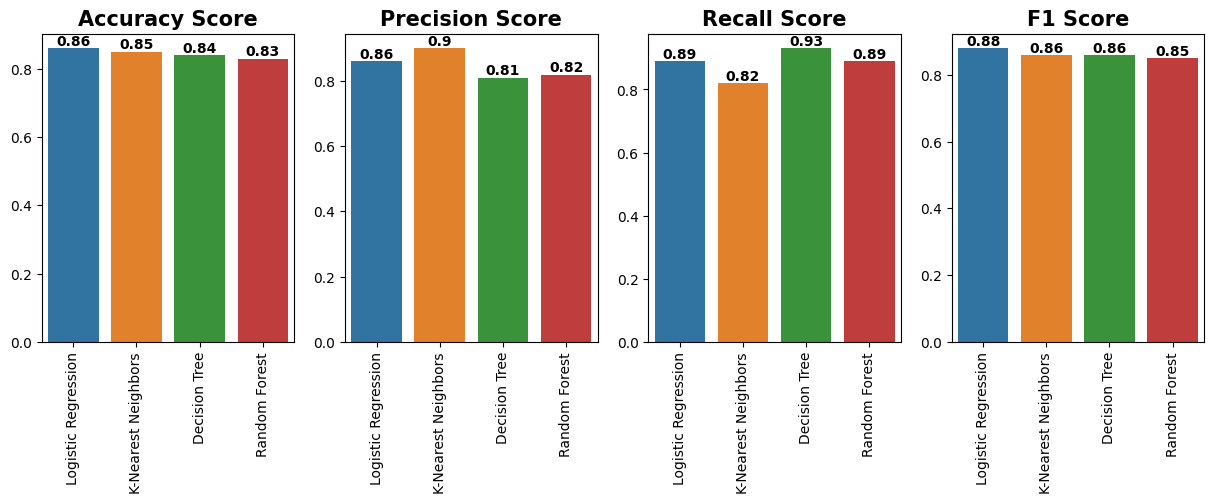

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

sns.barplot(x=eval_df.index, y=eval_df.Accuracy, ax=ax[0])
for i, v in enumerate(eval_df.Accuracy.values):
    ax[0].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')

sns.barplot(x=eval_df.index, y=eval_df.Precision, ax=ax[1])
for i, v in enumerate(eval_df.Precision.values):
    ax[1].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')

sns.barplot(x=eval_df.index, y=eval_df.Recall, ax=ax[2])
for i, v in enumerate(eval_df.Recall.values):
    ax[2].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')

sns.barplot(x=eval_df.index, y=eval_df['F1 Score'], ax=ax[3])
for i, v in enumerate(eval_df['F1 Score'].values):
    ax[3].text(i, v, str(v), fontweight='bold', ha='center', va='bottom')

ax[0].set_title("Accuracy Score", size=15, weight='heavy')
ax[1].set_title("Precision Score", size=15, weight='heavy')
ax[2].set_title("Recall Score", size=15, weight='heavy')
ax[3].set_title("F1 Score", size=15, weight='heavy')

# Clear x-axis labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')

# Clear y-axis labels
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

# Set x-axis tick labels
ax[0].set_xticklabels(eval_df.index, rotation=90)
ax[1].set_xticklabels(eval_df.index, rotation=90)
ax[2].set_xticklabels(eval_df.index, rotation=90)
ax[3].set_xticklabels(eval_df.index, rotation=90)

plt.show()


Logistic Regression shows the highest Accuracy Score and F1 score

KNN shows the highest Precision Score

Decision Tree shows the highest Recall Score

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Generate & Visualize Feature Importances

In [43]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

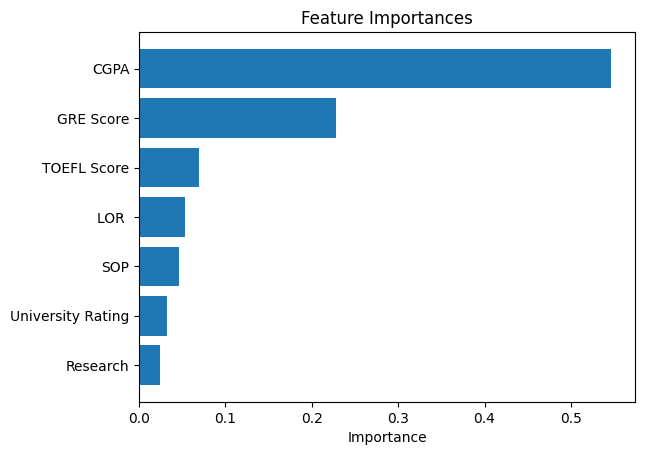

In [ ]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=1)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

CGPA seems to be the most crucial factor for Graduate admissions, Next is the GRE Score.